In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
def LinUCB(alpha, K, d, t):
    
    # initial
    A = np.identity(d)
    b = np.zeros((d,1))
    #X = np.array([[0.1,0.2,0.8,0.3,0.7],[0.2,0.5,0.4,0.2,0.5],[0.3,0.4,0.2,0.5,0.1]])
    #X = np.random.rand(d,K)
    #theta_true = np.array([[0.2],[0.2],[0.2]])
    theta_true = np.random.rand(d,1)
    graph = pd.DataFrame(None, columns=['time','regret'])
    
    # Repeat K
    for i in range(t):
        theta = np.dot(np.linalg.inv(A),b)
        p = []
        X = np.random.rand(d,K)
        
        # calculate UCB
        for j in range(K):
            X_ = X[:,j].reshape((-1,1))
            p_ = np.dot(np.transpose(theta),X_)+alpha*np.sqrt(np.dot(np.dot(np.transpose(X_),np.linalg.inv(A)),X_))
            p.append(p_[0])
            
        # choose Max
        a = p.index(max(p))
        X_a = X[:,a].reshape((-1,1))
        
        
        # calculate payoff
        r = np.dot(np.transpose(X_a),theta_true)
        
        # update A and b
        A = A+np.dot(X_a,np.transpose(X_a))
        b = b+np.dot(X_a,r)
        
        # regret
        ## 누적합으로 바꾸기
        
        regret = np.dot(np.transpose(X_a),theta_true)-np.dot(np.transpose(X_a),theta)
        graph = graph.append({'time':i,'regret':regret},ignore_index=True)
    
    # 그래프그리기
    graph['accumulated_regret']=graph['regret'].cumsum()
     
    """    
    x=graph['time']
    y=graph['accumulated_regret']
        
    plt.plot(x,y)
    plt.xlabel('time')
    plt.ylabel('accumulated regret')
    plt.title('LinUCB')
    plt.show()
    
    """
    return graph

In [56]:
def WLinUCB(alpha, K, d, t):
    
    # initial
    A = np.identity(d)
    b = np.zeros((d,1))
    #X = np.array([[0.1,0.2,0.8,0.3,0.7],[0.2,0.5,0.4,0.2,0.5],[0.3,0.4,0.2,0.5,0.1]])
    #X = np.random.rand(d,K)
    #theta_true = np.array([[0.2],[0.2],[0.2]])
    theta_true = np.random.rand(d,1)
    graph2 = pd.DataFrame(None, columns=['time','regret'])
    
    # Repeat K
    for i in range(t):
        theta = np.dot(np.linalg.inv(A),b)
        p = []
        X = np.random.rand(d,K)
        
        # calculate UCB
        for j in range(K):
            X_ = X[:,j].reshape((-1,1))
            p_ = np.dot(np.transpose(theta),X_)+alpha*np.sqrt(np.dot(np.dot(np.transpose(X_),np.linalg.inv(A)),X_))
            p.append(p_[0])
            
        # choose Max
        a = p.index(max(p))
        X_a = X[:,a].reshape((-1,1))
        
        
        # calculate payoff
        r = np.dot(np.transpose(X_a),theta_true)
        
        # update w, A and b
        w = np.random.rand(1,1)
        A = A+np.dot(np.dot(X_a,w),np.transpose(X_a))
        b = b+np.dot(np.dot(X_a,w),r)
        
        # regret
        ## 누적합으로 바꾸기
        
        regret = np.dot(np.transpose(X_a),theta_true)-np.dot(np.transpose(X_a),theta)
        graph2 = graph2.append({'time':i,'regret2':regret},ignore_index=True)
    
    # 그래프그리기

    graph2['accumulated_regret2']=graph2['regret2'].cumsum()
    """ 
    x=graph2['time']
    y=graph2['accumulated_regret']
        
    plt.plot(x,y)
    plt.xlabel('time')
    plt.ylabel('accumulated regret')
    plt.title('LinUCB')
    plt.show()
    """
    
    return graph2

1 ....
2 ....
3 ....
3 번째만에 됨


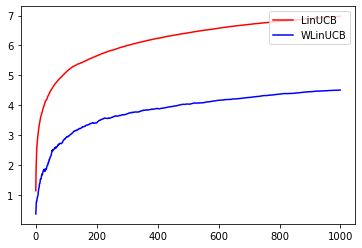

In [142]:
cnt = 0
while True:
    cnt=cnt+1
    print(cnt,'....')
    graph = LinUCB(0.8,5,3,1000)
    graph2 = WLinUCB(0.8,5,3,1000)
    
    if graph['accumulated_regret'][500]>graph2['accumulated_regret2'][500]:
        print(cnt,'번째만에 됨')

        plt.plot(graph['time'],graph['accumulated_regret'],'r',label='LinUCB')
        plt.plot(graph2['time'],graph2['accumulated_regret2'],'b',label='WLinUCB')
        plt.legend(loc='upper right')
        plt.show()
        
        break
        
        